In [1]:
from dataloader import load_gdsc, prepare_features, split_data
import matplotlib.pyplot as plt
import seaborn as sns


excluded_columns = ['LN_IC50', 'AUC', 'Z_SCORE', 'DRUG_ID', 'COSMIC_ID', 'DRUG_NAME', 'CELL_LINE_NAME']
df = load_gdsc(excluded_columns=excluded_columns)   # With Drop NaN & Exclude Outlier with IQR

# Create dummy variables for categorical features and split the data into training and testing sets with default test size of 0.2
X_dummy, y = prepare_features(df, encode_dummies=True)
X_label, _ = prepare_features(df, encode_dummies=False)
Xd_tr, Xd_te, Xl_tr, Xl_te, y_tr, y_te = split_data(X_dummy, X_label, y) 
# Xd: X features with dummy variables
# Xl: X features with label encoding (e.g. Turn R, G, B into 0, 1, 2)

In [2]:
print("Dummy-encoded shape:", X_dummy.shape)
print(X_dummy[:5])

print("Label-encoded shape:", X_label.shape)
print(X_label[:5])

Dummy-encoded shape: (166644, 336)
   TCGA_DESC_ACC  TCGA_DESC_ALL  TCGA_DESC_BLCA  TCGA_DESC_BRCA  \
0          False          False           False           False   
1          False          False           False           False   
2          False          False            True           False   
3          False          False            True           False   
4          False          False            True           False   

   TCGA_DESC_CESC  TCGA_DESC_CLL  TCGA_DESC_COREAD  TCGA_DESC_DLBC  \
0           False          False             False           False   
1           False          False             False           False   
2           False          False             False           False   
3           False          False             False           False   
4           False          False             False           False   

   TCGA_DESC_ESCA  TCGA_DESC_GBM  ...  TARGET_PATHWAY_Metabolism  \
0           False          False  ...                      False   
1    

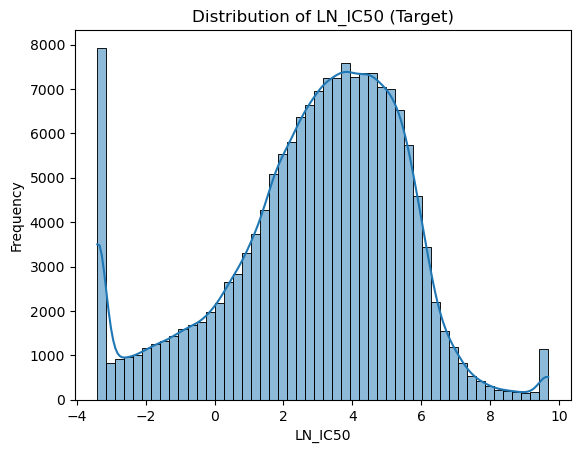

In [3]:
sns.histplot(y, bins=50, kde=True)
plt.title("Distribution of LN_IC50 (Target)")
plt.xlabel("LN_IC50")
plt.ylabel("Frequency")
plt.show()

In [4]:
print(y)

0        -1.463887
1        -1.235034
2        -2.963191
3        -1.449138
4        -2.350633
            ...   
166639    9.316959
166640    9.686618
166641    8.576377
166642    9.686618
166643    9.686618
Name: LN_IC50, Length: 166644, dtype: float64


Categorical columns: ['CELL_LINE_NAME', 'TCGA_DESC', 'DRUG_NAME', 'GDSC Tissue descriptor 1', 'GDSC Tissue descriptor 2', 'Cancer Type (matching TCGA label)', 'Microsatellite instability Status (MSI)', 'Screen Medium', 'Growth Properties', 'CNA', 'Gene Expression', 'Methylation', 'TARGET', 'TARGET_PATHWAY']


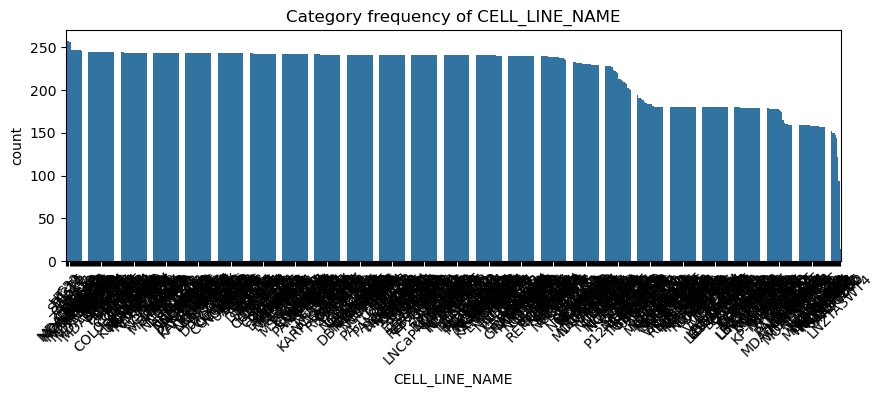

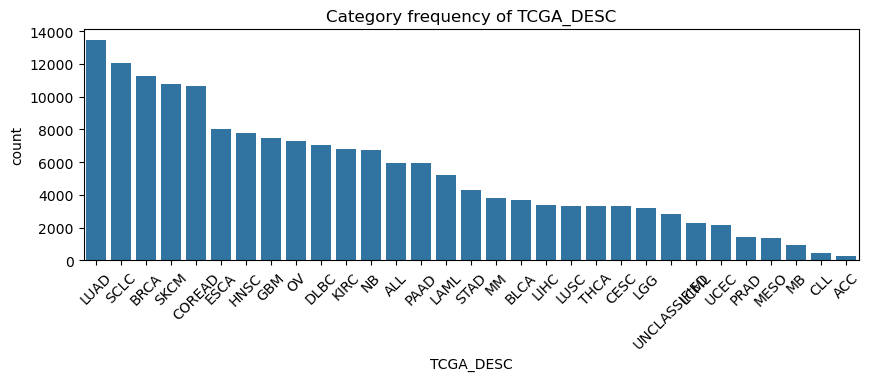

In [5]:
# Check a few categorical column names before encoding
cats = df.select_dtypes(include=["object", "category"]).columns.tolist()
print("Categorical columns:", cats)

# Before encoding (label-style)
for col in cats[:2]:  # Just pick two
    plt.figure(figsize=(10, 3))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Category frequency of {col}")
    plt.xticks(rotation=45)
    plt.show()

In [6]:
import pandas as pd


sample = df[cats[0]].copy()
factorized = pd.factorize(sample)[0]
dummies = pd.get_dummies(sample)

print("Original sample (first 10):", sample[:10].tolist())
print("Label encoded (first 10):", factorized[:10])
print("One-hot encoded shape:", dummies.shape)
print(dummies.head(10))

Original sample (first 10): ['PFSK-1', 'COLO-829', 'RT4', 'SW780', 'TCCSUP', 'C-33-A', 'C-4-I', 'ME-180', '42-MG-BA', '8-MG-BA']
Label encoded (first 10): [0 1 2 3 4 5 6 7 8 9]
One-hot encoded shape: (166644, 751)
    22RV1  23132-87  42-MG-BA  451Lu  639-V  647-V  769-P  786-0  8-MG-BA  \
0   False     False     False  False  False  False  False  False    False   
5   False     False     False  False  False  False  False  False    False   
7   False     False     False  False  False  False  False  False    False   
8   False     False     False  False  False  False  False  False    False   
9   False     False     False  False  False  False  False  False    False   
10  False     False     False  False  False  False  False  False    False   
11  False     False     False  False  False  False  False  False    False   
12  False     False     False  False  False  False  False  False    False   
13  False     False      True  False  False  False  False  False    False   
14  False     Fa

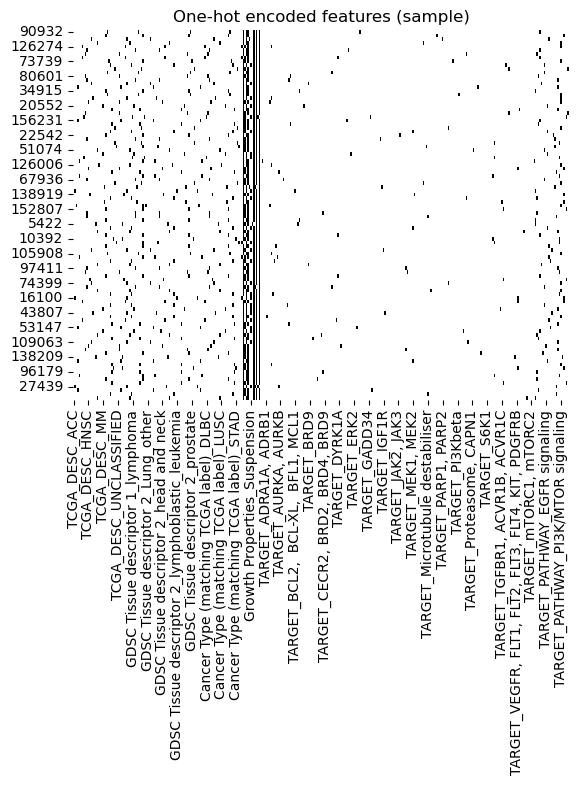

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(X_dummy.sample(100).astype(int), cmap="Greys", cbar=False)
plt.title("One-hot encoded features (sample)")
plt.show()

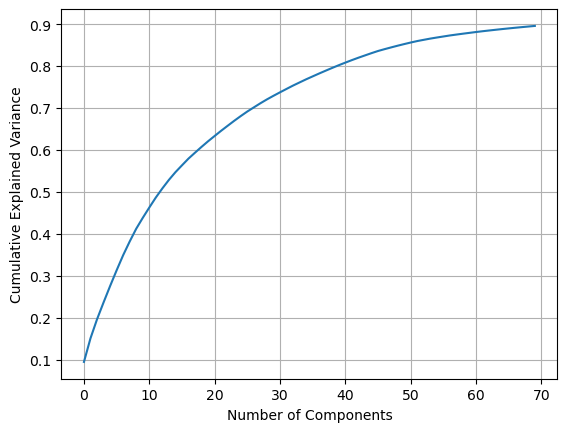

In [14]:
from sklearn.decomposition import PCA
import numpy as np


pca = PCA(n_components=70).fit(X_dummy)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Find Number of PCA to Use')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.savefig("Find Number of PCA to Use.png", dpi=300, bbox_inches='tight')
